# Session 11

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
n_samples = 500
seed = 30
random_state=170

In [3]:
def plot_clusters(clusters, centers=None):
    """
    clusters (tuple[np.ndarray, iter]): A tuple of coordinates and cluster labels.
    centers (np.ndarray): An array of cluster centers where each row corresponds to a center.
    """
    x, y = clusters[0][:, 0], clusters[0][:, 1]
    labels = clusters[1]
    plt.scatter(x, y, marker="o", c=labels, edgecolors='black', alpha=0.5)

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, color="red", linewidths=5)
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Elbow Method

## 2D Data

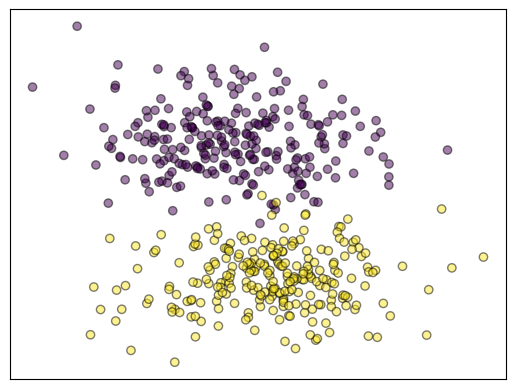

In [4]:
blobs = datasets.make_blobs(
    n_samples=n_samples,
    centers=2,
    cluster_std=1,
    random_state=seed
)
plot_clusters(blobs)

## When we can't visualize

In [5]:
blobs = datasets.make_blobs(
    n_samples=10 * n_samples,
    n_features=10,
    centers=4,
    cluster_std=1,
    random_state=seed
)

In [6]:
inertia = {}
for c in range(2, 8):
    kmeans = KMeans(
        n_clusters=c,
        init="k-means++",
        n_init=1,
        max_iter=300,
        random_state=seed
    ).fit(blobs[0])
    inertia[c] = kmeans.inertia_

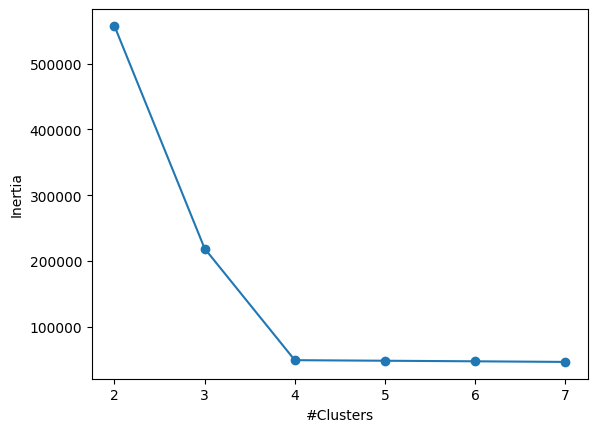

In [7]:
plt.figure()
plt.plot(inertia.keys(), inertia.values(), marker="o")
plt.xlabel("#Clusters")
plt.ylabel("Inertia")
plt.show()

## Crescents

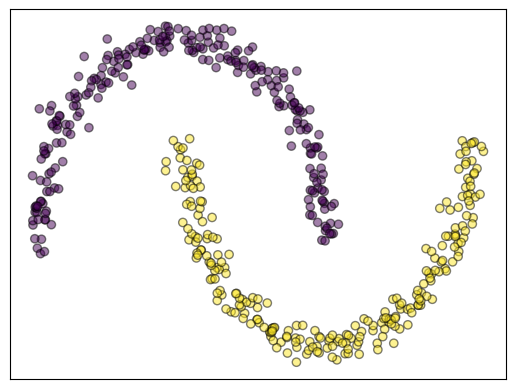

In [8]:
crescents = datasets.make_moons(
    n_samples=n_samples,
    noise=0.05,
    random_state=seed
)
plot_clusters(crescents)

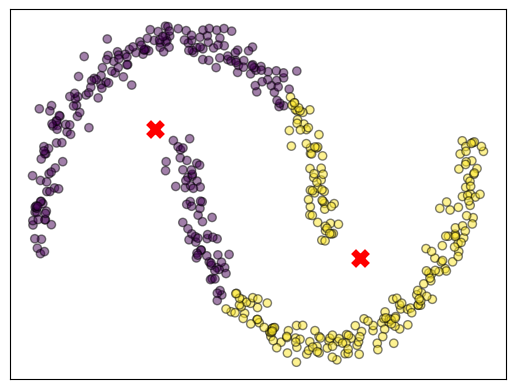

In [9]:
kmeans = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(crescents[0])
plot_clusters(
    clusters=(crescents[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

# Rings

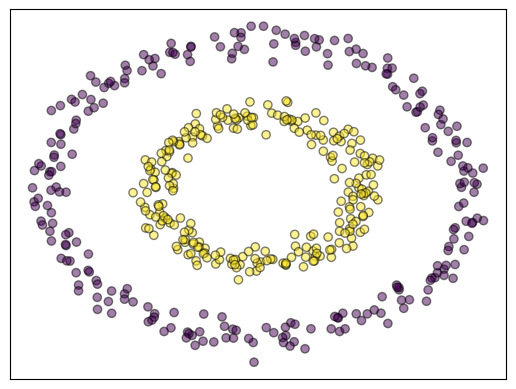

In [10]:
n_samples = 500
seed = 30
rings = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
plot_clusters(rings)

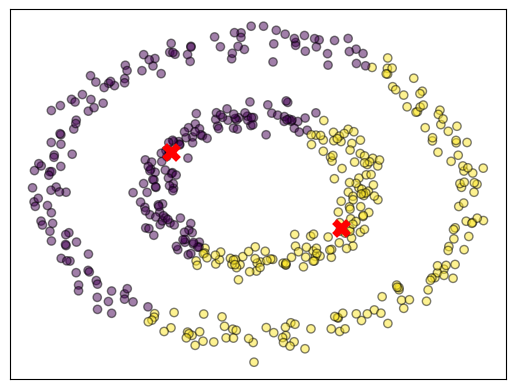

In [11]:
kmeans = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(rings[0])
plot_clusters(
    clusters=(rings[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

# Same size, different density

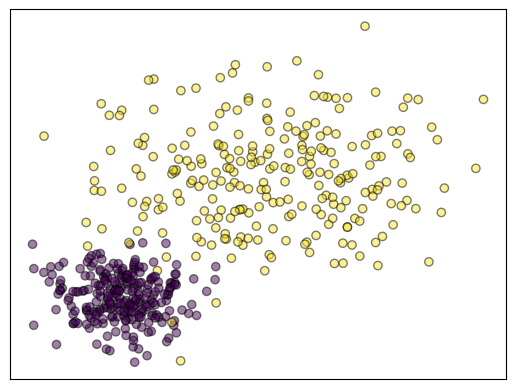

In [12]:
varied_density = datasets.make_blobs(
    n_samples=n_samples,
    centers=2,
    cluster_std=[1, 2.5],
    random_state=random_state
)
plot_clusters(varied_density)

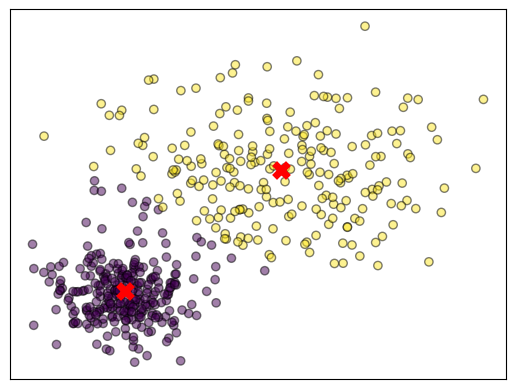

In [13]:
kmeans = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=random_state
)
clusters = kmeans.fit(varied_density[0])
plot_clusters(
    clusters=(varied_density[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

# Different size, same density

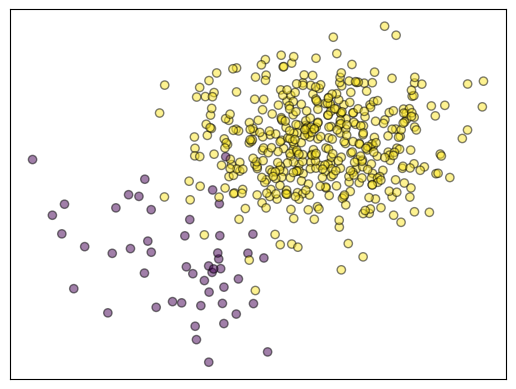

In [14]:
varied_size = datasets.make_blobs(
    n_samples=[int(0.1 * n_samples), int(0.9 * n_samples)],
    cluster_std=[2, 2],
    random_state=random_state
)
plot_clusters(varied_size)

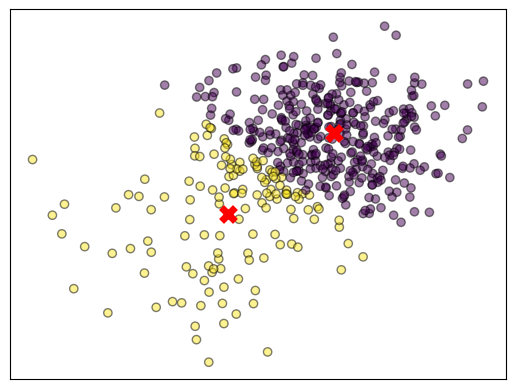

In [15]:
kmeans = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(varied_size[0])
plot_clusters(
    clusters=(varied_size[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

# Transformed

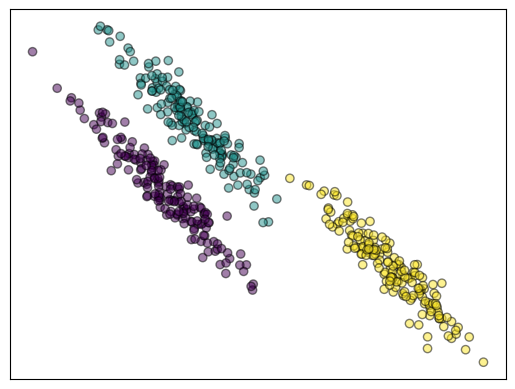

In [16]:
x, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
x_trans = np.dot(x, transformation)
transformed = (x_trans, y)

plot_clusters(transformed)

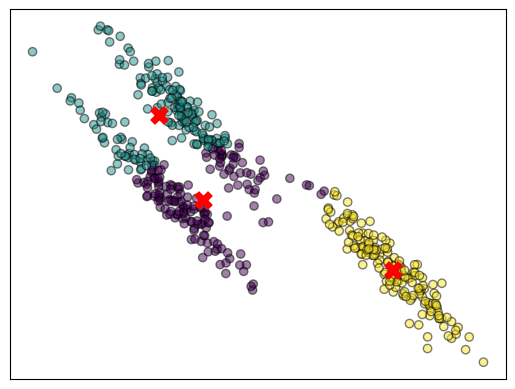

In [17]:
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(transformed[0])
plot_clusters(
    clusters=(transformed[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

## Inverse transformation

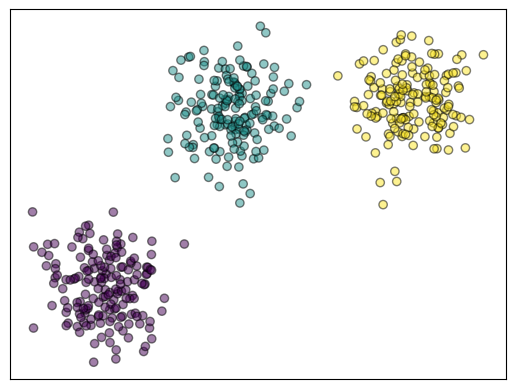

In [18]:
X_inv = np.dot(transformed[0], np.linalg.inv(transformation))
inv = (X_inv, y)
plot_clusters(inv)

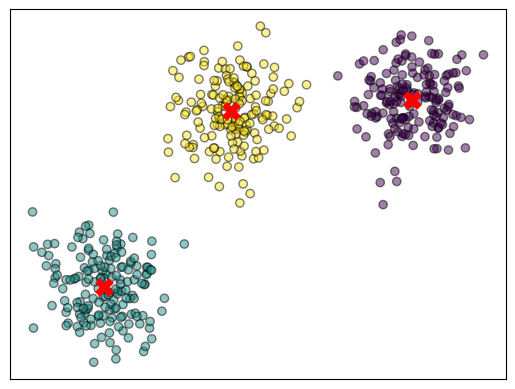

In [19]:
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(inv[0])
plot_clusters(
    clusters=(inv[0], clusters.labels_),
    centers=clusters.cluster_centers_
)

## Whiten

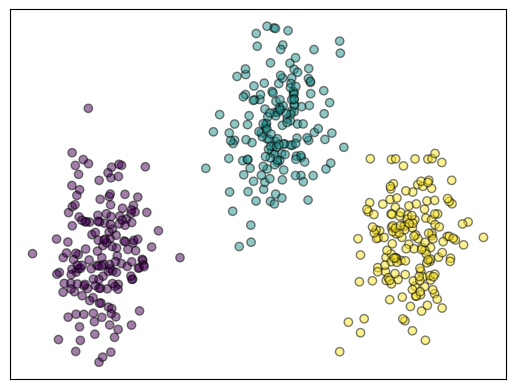

In [20]:
def whiten(X, fudge=1e-18):
   # get the covariance matrix
   Xcov = np.dot(X.T,X)

   # eigenvalue decomposition of the covariance matrix
   d, V = np.linalg.eigh(Xcov)

   # a fudge factor can be used so that eigenvectors associated with
   # small eigenvalues do not get overamplified.
   D = np.diag(1. / np.sqrt(d+fudge))

   # whitening matrix
   W = np.dot(np.dot(V, D), V.T)

   # multiply by the whitening matrix
   X_white = np.dot(X, W)

   return X_white, W

x_white = whiten(transformed[0])[0]
white = (x_white, y)
plot_clusters(white)

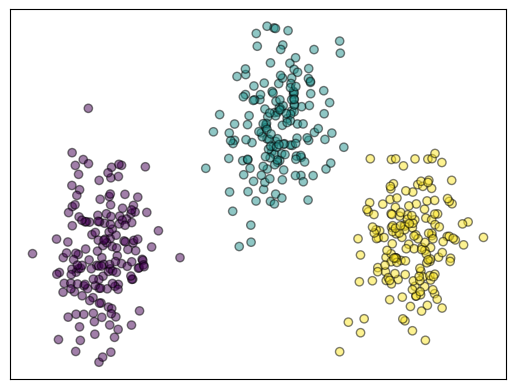

In [21]:
def svd_whiten(X):
    U, sigma, Vt = np.linalg.svd(X, full_matrices=False)
    # U and Vt are the singular matrices, and s contains the singular values.
    # Since the rows of both U and Vt are orthonormal vectors, then U * Vt
    # will be white
    X_white = np.dot(U, Vt)

    return X_white

x_svd = svd_whiten(transformed[0])
svd = (x_svd, y)
plot_clusters(svd)

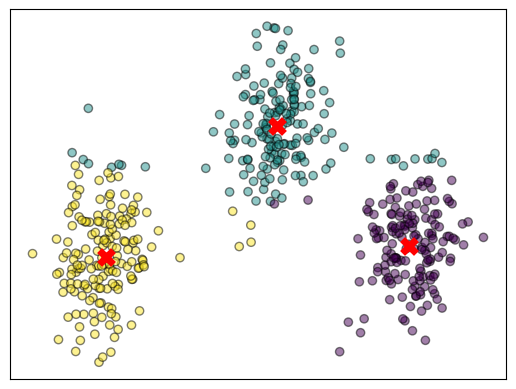

In [22]:
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=1,
    max_iter=300,
    random_state=seed
)
clusters = kmeans.fit(svd[0])
plot_clusters(
    clusters=(svd[0], clusters.labels_),
    centers=clusters.cluster_centers_
)